In [4]:
from google.colab import drive  # to mount Drive to Colab notebook
import csv
import time
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Connect Google Drive to Colab
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# Cargamos muestras

## Muestra 1


In [6]:
import joblib
%time X1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_train.joblib')
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_train.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')

CPU times: user 5.95 s, sys: 206 ms, total: 6.16 s
Wall time: 7.96 s
CPU times: user 5.69 s, sys: 121 ms, total: 5.81 s
Wall time: 6.19 s
CPU times: user 6.08 ms, sys: 2 ms, total: 8.08 ms
Wall time: 341 ms
CPU times: user 4.86 ms, sys: 0 ns, total: 4.86 ms
Wall time: 260 ms


In [7]:
def train(X,y,step):
  modelo = SGDClassifier(learning_rate = 'constant', eta0 = 0.1, verbose=2, n_jobs=4)
  for x in range(0,X.shape[0],step):
    modelo.partial_fit(X[x:x+step],y[x:x+step],classes=["fake","noFake"])
    if x%5==0:
      print(f'Avance: {(x+1)*100/X.shape[0]} %')
  return modelo

In [8]:
%time modelo1 = train(X1_train,y1_train,5000)

-- Epoch 1
Norm: 12.87, NNZs: 7784, Bias: -0.517000, T: 5000, Avg. loss: 0.746524
Total training time: 0.00 seconds.
Avance: 0.0013593051232210095 %
-- Epoch 1
Norm: 19.34, NNZs: 10222, Bias: -0.515000, T: 5000, Avg. loss: 0.543874
Total training time: 0.00 seconds.
Avance: 6.797884921228268 %
-- Epoch 1
Norm: 23.98, NNZs: 11704, Bias: -0.515000, T: 5000, Avg. loss: 0.477029
Total training time: 0.00 seconds.
Avance: 13.594410537333316 %
-- Epoch 1
Norm: 27.06, NNZs: 12826, Bias: -0.532000, T: 5000, Avg. loss: 0.419741
Total training time: 0.00 seconds.
Avance: 20.39093615343836 %
-- Epoch 1
Norm: 29.39, NNZs: 13618, Bias: -0.515000, T: 5000, Avg. loss: 0.395053
Total training time: 0.00 seconds.
Avance: 27.18746176954341 %
-- Epoch 1
Norm: 31.15, NNZs: 14302, Bias: -0.516000, T: 5000, Avg. loss: 0.396218
Total training time: 0.00 seconds.
Avance: 33.983987385648454 %
-- Epoch 1
Norm: 32.76, NNZs: 14827, Bias: -0.506000, T: 5000, Avg. loss: 0.357447
Total training time: 0.00 seconds.
A

In [ ]:
joblib.dump(modelo1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m1.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m1.joblib']

In [11]:
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m1.joblib')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [12]:
%time predictions1 = modelo1.predict(X1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 453 ms, sys: 3.88 ms, total: 457 ms
Wall time: 456 ms


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
print(f"acc: {accuracy_score(y1_test,predictions1)}")
print(f"precision: {precision_score(y1_test,predictions1,average='macro')}")
print(f"recall: {recall_score(y1_test,predictions1,average='macro')}")
print(f"f1: {f1_score(y1_test,predictions1,average='micro')}")

acc: 0.8908623806654191
precision: 0.8872716768537512
recall: 0.8870788919585106
f1: 0.8908623806654191


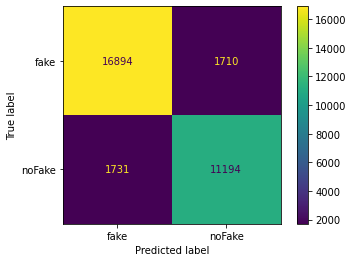

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res1,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 2


In [ ]:
from sklearn.externals import joblib
%time X2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_train.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_train.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')

CPU times: user 8.55 s, sys: 112 ms, total: 8.66 s
Wall time: 9.29 s
CPU times: user 8.4 s, sys: 71 ms, total: 8.47 s
Wall time: 9.12 s
CPU times: user 6.24 ms, sys: 6.1 ms, total: 12.3 ms
Wall time: 471 ms
CPU times: user 3.77 ms, sys: 1.11 ms, total: 4.88 ms
Wall time: 490 ms


In [ ]:
%time modelo2 = train(X2_train,y2_train,5000)


-- Epoch 1
Norm: 11.93, NNZs: 7238, Bias: -0.100000, T: 5000, Avg. loss: 0.735198
Total training time: 0.24 seconds.
Avance: 0.0013593051232210095 %
-- Epoch 1
Norm: 19.21, NNZs: 9707, Bias: -0.900000, T: 5000, Avg. loss: 0.560065
Total training time: 0.28 seconds.
Avance: 6.797884921228268 %
-- Epoch 1
Norm: 23.90, NNZs: 11266, Bias: -0.600000, T: 5000, Avg. loss: 0.478187
Total training time: 0.27 seconds.
Avance: 13.594410537333316 %
-- Epoch 1
Norm: 26.80, NNZs: 12320, Bias: -0.900000, T: 5000, Avg. loss: 0.438594
Total training time: 0.23 seconds.
Avance: 20.39093615343836 %
-- Epoch 1
Norm: 29.34, NNZs: 13195, Bias: -0.600000, T: 5000, Avg. loss: 0.418622
Total training time: 0.26 seconds.
Avance: 27.18746176954341 %
-- Epoch 1
Norm: 31.25, NNZs: 13916, Bias: -0.500000, T: 5000, Avg. loss: 0.401939
Total training time: 0.20 seconds.
Avance: 33.983987385648454 %
-- Epoch 1
Norm: 32.89, NNZs: 14492, Bias: -0.400000, T: 5000, Avg. loss: 0.380439
Total training time: 0.25 seconds.
Av

In [ ]:
joblib.dump(modelo2, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m2.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m2.joblib']

In [ ]:
%time predictions2 = modelo2.predict(X2_test)

CPU times: user 1.99 s, sys: 70.7 ms, total: 2.06 s
Wall time: 1.83 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res2 = confusion_matrix(y2_test, predictions2)
print(f"acc: {accuracy_score(y2_test,predictions2)}")
print(f"precision: {precision_score(y2_test,predictions2,average='macro')}")
print(f"recall: {recall_score(y2_test,predictions2,average='macro')}")
print(f"f1: {f1_score(y2_test,predictions2,average='micro')}")

acc: 0.8878175647816297
precision: 0.8910991068092491
recall: 0.8764097881240156
f1: 0.8878175647816298


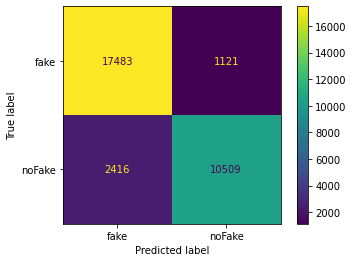

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res2,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 3


In [ ]:
from sklearn.externals import joblib
%time X3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_train.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_train.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 8.81 s, sys: 104 ms, total: 8.91 s
Wall time: 9.49 s
CPU times: user 8.14 s, sys: 75.4 ms, total: 8.22 s
Wall time: 8.88 s
CPU times: user 7.2 ms, sys: 1.01 ms, total: 8.21 ms
Wall time: 518 ms
CPU times: user 4.49 ms, sys: 0 ns, total: 4.49 ms
Wall time: 463 ms


In [ ]:
%time modelo3 = train(X3_train,y3_train,5000)


-- Epoch 1
Norm: 11.88, NNZs: 7397, Bias: -0.600000, T: 5000, Avg. loss: 0.740414
Total training time: 0.30 seconds.
Avance: 0.0013593051232210095 %
-- Epoch 1
Norm: 19.21, NNZs: 9979, Bias: -0.600000, T: 5000, Avg. loss: 0.575998
Total training time: 0.28 seconds.
Avance: 6.797884921228268 %
-- Epoch 1
Norm: 23.70, NNZs: 11489, Bias: -0.800000, T: 5000, Avg. loss: 0.466986
Total training time: 0.27 seconds.
Avance: 13.594410537333316 %
-- Epoch 1
Norm: 26.85, NNZs: 12573, Bias: -0.500000, T: 5000, Avg. loss: 0.448003
Total training time: 0.20 seconds.
Avance: 20.39093615343836 %
-- Epoch 1
Norm: 29.41, NNZs: 13458, Bias: -0.500000, T: 5000, Avg. loss: 0.415972
Total training time: 0.25 seconds.
Avance: 27.18746176954341 %
-- Epoch 1
Norm: 31.46, NNZs: 14129, Bias: -0.800000, T: 5000, Avg. loss: 0.384388
Total training time: 0.23 seconds.
Avance: 33.983987385648454 %
-- Epoch 1
Norm: 32.99, NNZs: 14644, Bias: -0.800000, T: 5000, Avg. loss: 0.370886
Total training time: 0.23 seconds.
Av

In [ ]:
joblib.dump(modelo3, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m3.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m3.joblib']

In [ ]:
%time predictions3 = modelo3.predict(X3_test)

CPU times: user 2.01 s, sys: 42.8 ms, total: 2.06 s
Wall time: 1.85 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {accuracy_score(y3_test,predictions3)}")
print(f"precision: {precision_score(y3_test,predictions3,average='macro')}")
print(f"recall: {recall_score(y3_test,predictions3,average='macro')}")
print(f"f1: {f1_score(y3_test,predictions3,average='micro')}")

acc: 0.8374195185384884
precision: 0.8739287127643781
recall: 0.8063547865374514
f1: 0.8374195185384884


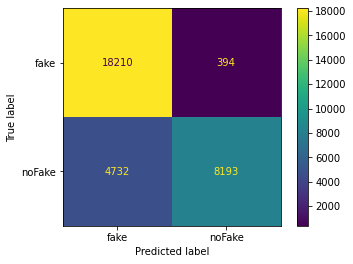

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res3,display_labels=['fake','noFake']).plot(values_format='d')

# Modelo 1 Aplicado a otras muestras


In [29]:
import joblib
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m1.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [18]:
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 5.99 s, sys: 60.3 ms, total: 6.05 s
Wall time: 6.07 s
CPU times: user 3.02 ms, sys: 0 ns, total: 3.02 ms
Wall time: 3.58 ms
CPU times: user 6.05 s, sys: 80.7 ms, total: 6.13 s
Wall time: 6 s
CPU times: user 2.13 ms, sys: 1.01 ms, total: 3.14 ms
Wall time: 4.16 ms
CPU times: user 5.75 s, sys: 146 ms, total: 5.89 s
Wall time: 5.66 s
CPU times: user 1.94 ms, sys: 976 µs, total: 2.91 ms
Wall time: 4.43 ms


In [30]:
%time predictions1 = modelo1.predict(X1_test)
%time predictions2 = modelo1.predict(X2_test)
%time predictions3 = modelo1.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 463 ms, sys: 3.87 ms, total: 467 ms
Wall time: 472 ms
CPU times: user 469 ms, sys: 2.84 ms, total: 472 ms
Wall time: 472 ms
CPU times: user 456 ms, sys: 887 µs, total: 457 ms
Wall time: 458 ms


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.891 | 0.893 | 0.894
precision: 0.887 | 0.889 | 0.89 
recall: 0.887 | 0.89 | 0.89  
f1: 0.891 | 0.893 | 0.894  


# Modelo 2 Aplicado a otras muestras


In [32]:
modelo2 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m2.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [33]:
%time predictions1 = modelo2.predict(X1_test)
%time predictions2 = modelo2.predict(X2_test)
%time predictions3 = modelo2.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 471 ms, sys: 2.96 ms, total: 474 ms
Wall time: 473 ms
CPU times: user 480 ms, sys: 3.83 ms, total: 483 ms
Wall time: 482 ms
CPU times: user 460 ms, sys: 1.85 ms, total: 462 ms
Wall time: 462 ms


In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.89 | 0.888 | 0.891
precision: 0.894 | 0.891 | 0.894 
recall: 0.878 | 0.876 | 0.879  
f1: 0.89 | 0.888 | 0.891  


# Modelo 3 Aplicado a otras muestras


In [35]:
modelo3 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloSVM_m3.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [36]:
%time predictions1 = modelo3.predict(X1_test)
%time predictions2 = modelo3.predict(X2_test)
%time predictions3 = modelo3.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 474 ms, sys: 2.96 ms, total: 477 ms
Wall time: 481 ms
CPU times: user 476 ms, sys: 809 µs, total: 477 ms
Wall time: 478 ms
CPU times: user 709 ms, sys: 1.68 ms, total: 710 ms
Wall time: 724 ms


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.84 | 0.843 | 0.837
precision: 0.877 | 0.878 | 0.874 
recall: 0.81 | 0.813 | 0.806  
f1: 0.84 | 0.843 | 0.837  
